References: 
https://crude2refined.wordpress.com/2013/07/30/sparse-pca-example-in-r-part-1/
https://rdrr.io/cran/elasticnet/man/spca.html

In [34]:
df = read.csv(file="GRE(0329).csv",sep=",",header=TRUE)
x = as.matrix(df)
x = scale(x)
x

Average.Precol.GPA,GRE.Combined.General.Write.Score,GRE.Combined.Quantitative.Score,GRE.Combined.General.Verbal.Score
-1.867645e-01,-4.881897,0.03397846,-1.28543697
-1.890938e+00,-4.015234,-0.89283377,-1.15636475
-2.545443e-07,-4.015234,-0.32644852,-1.34997308
-2.545443e-07,-4.015234,0.03397846,-1.47904529
-2.545443e-07,-4.015234,0.08546803,-1.15636475
5.577775e-01,-4.015234,-0.17197981,-1.28543697
1.087230e+00,-4.015234,-0.32644852,0.65064627
-1.152035e+01,-3.148570,0.08546803,-0.44646757
-3.644748e+00,-3.148570,0.13695760,-1.54358140
-1.394577e+00,-3.148570,-0.17197981,-1.47904529


In [35]:
test.pr = princomp(x,cor=TRUE)
summary(test.pr,loadings=TRUE)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.3558768 1.0980894 0.9011237 0.37917497
Proportion of Variance 0.4596005 0.3014501 0.2030060 0.03594341
Cumulative Proportion  0.4596005 0.7610506 0.9640566 1.00000000

Loadings:
                                  Comp.1 Comp.2 Comp.3 Comp.4
Average.Precol.GPA                 0.121  0.663  0.739       
GRE.Combined.General.Write.Score   0.195  0.691 -0.652 -0.243
GRE.Combined.Quantitative.Score    0.667 -0.286  0.148 -0.672
GRE.Combined.General.Verbal.Score  0.708                0.700

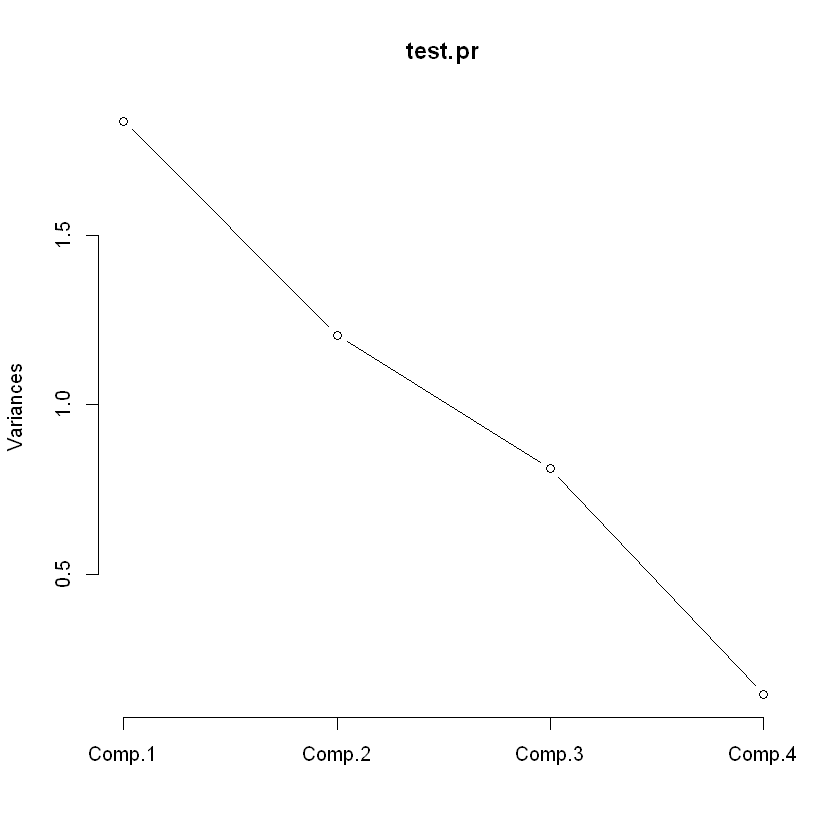

In [36]:
screeplot(test.pr,type="lines")
p<-predict(test.pr)

In [5]:
install.packages("elasticnet")
library(elasticnet)

Installing package into 'C:/Users/36961/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'elasticnet' is in use and will not be installed"

In [6]:
out = spca(x=x,K=3,type="predictor",sparse="varnum",para=c(3,3,3))

You may wish to restart and use a more efficient way 
let the argument x be the sample covariance/correlation matrix and set type=Gram 


In [7]:
out$loadings

,PC1,PC2,PC3
GRE.Analytical.Writing.Score,0.0000000000,-0.7160647,0.0000000000
GRE.Quantitative.Score,0.0000000000,0.2998012,0.0000000000
GRE.Revised.General.Quant.Score,0.6913300576,0.0000000,0.0001749399
GRE.Revised.General.Verbal.Score,0.7225389321,0.0000000,0.0000000000
GRE.Revised.General.Write.Score,0.0000000000,0.0000000,-0.7501280614
GRE.Verbal.Score,0.0000000000,-0.6303734,0.0000000000
Average.Precol.GPA,-0.0004930051,0.0000000,-0.6612925683


In [8]:
out


Call:
spca(x = x, K = 3, para = c(3, 3, 3), type = "predictor", sparse = "varnum")

3 sparse PCs 
Pct. of exp. var. : 26.5 23.5 15.9 
Num. of non-zero loadings :  3 3 3 
Sparse loadings 
                                   PC1    PC2    PC3
GRE.Analytical.Writing.Score     0.000 -0.716  0.000
GRE.Quantitative.Score           0.000  0.300  0.000
GRE.Revised.General.Quant.Score  0.691  0.000  0.000
GRE.Revised.General.Verbal.Score 0.723  0.000  0.000
GRE.Revised.General.Write.Score  0.000  0.000 -0.750
GRE.Verbal.Score                 0.000 -0.630  0.000
Average.Precol.GPA               0.000  0.000 -0.661

In [21]:
df = read.csv(file="pca_som_df(0324).csv",sep=",",header=TRUE)
x = as.matrix(df)
x = scale(x)
x[is.na(x)] = 0
x

GRE.Analytical.Writing.Score,GRE.Quantitative.Score,GRE.Verbal.Score,GRE.Revised.General.Quant.Score,GRE.Revised.General.Verbal.Score,GRE.Revised.General.Write.Score,GMAT.Score,Average.Precol.GPA
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,1.001240e+00,-3.330810e+00
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,2.796080e-09,-2.489857e+00
2.1397870,1.5342308,0.6202505,0,0.000000,0.000000,2.796080e-09,-1.604643e+00
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,2.796080e-09,-1.604643e+00
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,2.796080e-09,-1.383340e+00
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,2.796080e-09,-1.250558e+00
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,2.820393e-02,-1.250558e+00
2.1397870,1.5342308,-3.3670744,0,0.000000,0.000000,2.796080e-09,-1.228428e+00
0.0000000,0.0000000,0.0000000,0,0.000000,0.000000,1.325585e+00,-9.849940e-01
2.1397870,-4.4692810,-5.3607369,0,0.000000,0.000000,3.525491e-01,-7.415603e-01


In [22]:
library(elasticnet)

In [23]:
out = spca(x=x,K=3,type="predictor",sparse="varnum",para=c(3,3,3))

In [24]:
out$loadings

,PC1,PC2,PC3
GRE.Analytical.Writing.Score,0.00000000,0.0000000,0.9844684
GRE.Quantitative.Score,0.00000000,0.7274884,0.1185294
GRE.Verbal.Score,0.00000000,0.6629630,-0.1295094
GRE.Revised.General.Quant.Score,0.00000000,0.0000000,0.0000000
GRE.Revised.General.Verbal.Score,0.70694594,0.0000000,0.0000000
GRE.Revised.General.Write.Score,0.70694594,0.0000000,0.0000000
GMAT.Score,0.00000000,0.0000000,0.0000000
Average.Precol.GPA,-0.02132786,0.1767501,0.0000000


In [25]:
out


Call:
spca(x = x, K = 3, para = c(3, 3, 3), type = "predictor", sparse = "varnum")

3 sparse PCs 
Pct. of exp. var. : 28.6 21.0 15.6 
Num. of non-zero loadings :  3 3 3 
Sparse loadings 
                                    PC1   PC2    PC3
GRE.Analytical.Writing.Score      0.000 0.000  0.984
GRE.Quantitative.Score            0.000 0.727  0.119
GRE.Verbal.Score                  0.000 0.663 -0.130
GRE.Revised.General.Quant.Score   0.000 0.000  0.000
GRE.Revised.General.Verbal.Score  0.707 0.000  0.000
GRE.Revised.General.Write.Score   0.707 0.000  0.000
GMAT.Score                        0.000 0.000  0.000
Average.Precol.GPA               -0.021 0.177  0.000